In [8]:
import json as js
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
bus = pd.read_json('./Yelp_dataset_business_clean.json', encoding='utf8')
checkin = pd.read_json('./Yelp_dataset_checkin_clean.json', encoding='utf8')
review = pd.read_json('./Yelp_dataset_review_clean.json', encoding='utf8')

In [184]:
busId = bus.business_id
cuisine = ['Chinese', 'Italian', 'Japanese', 'Korean', 'Mexican', 'American', 'Greek', 'French', 'Spanish', 'Turkish', 'Vietnamese',
          'Taiwanese', 'Russian', 'German',  'Argentine', 'Thai', 'Middle Eastern', 'Brazilian', 'Pakistani', 
          'Indian','Filipino', 'Pizza', 'Caribbean', 'Hawaiian', 'Cuban', 'Mediterranean', 'Coffee & Tea','Breakfast & Brunch', 'Fast Food', 'Bars']

In [185]:
total = 0
covered = set()
for c in cuisine:
    for i in range(len(bus)):
        if i not in covered and c in bus.iloc[i].categories:
            covered.add(i)

In [186]:
cuiDic = dict()
covered.clear()

for c in cuisine:
    cuiDic[c] = list()
    for i in range(len(bus)):
        row = bus.iloc[i]
        if i not in covered and c in row.categories:
            cuiDic[c].append(row.business_id)
            covered.add(i)

In [187]:
cuiCount = dict()
for c in cuisine:
    cuiCount[c] = len(cuiDic[c])
    
cuiCount2 = cuiCount.copy()
del (cuiCount2['Fast Food'])
del (cuiCount2['Bars'])
del (cuiCount2['Coffee & Tea'])
del (cuiCount2['Breakfast & Brunch'])

sortCount = sorted(cuiCount.items(), key=lambda x: x[1], reverse=True)
countName = list()
counts = list()
for i in sortCount:
    countName.append(i[0])
    counts.append(i[1])
    
sortCount2 = sorted(cuiCount2.items(), key=lambda x: x[1], reverse=True)
countName2 = list()
counts2 = list()
for i in sortCount2:
    countName2.append(i[0])
    counts2.append(i[1])
    
countName[4] = '(Non-Italian) Pizza'
countName2[3] = '(Non-Italian) Pizza'

Text(0, 0.5, '# of Restaurants')

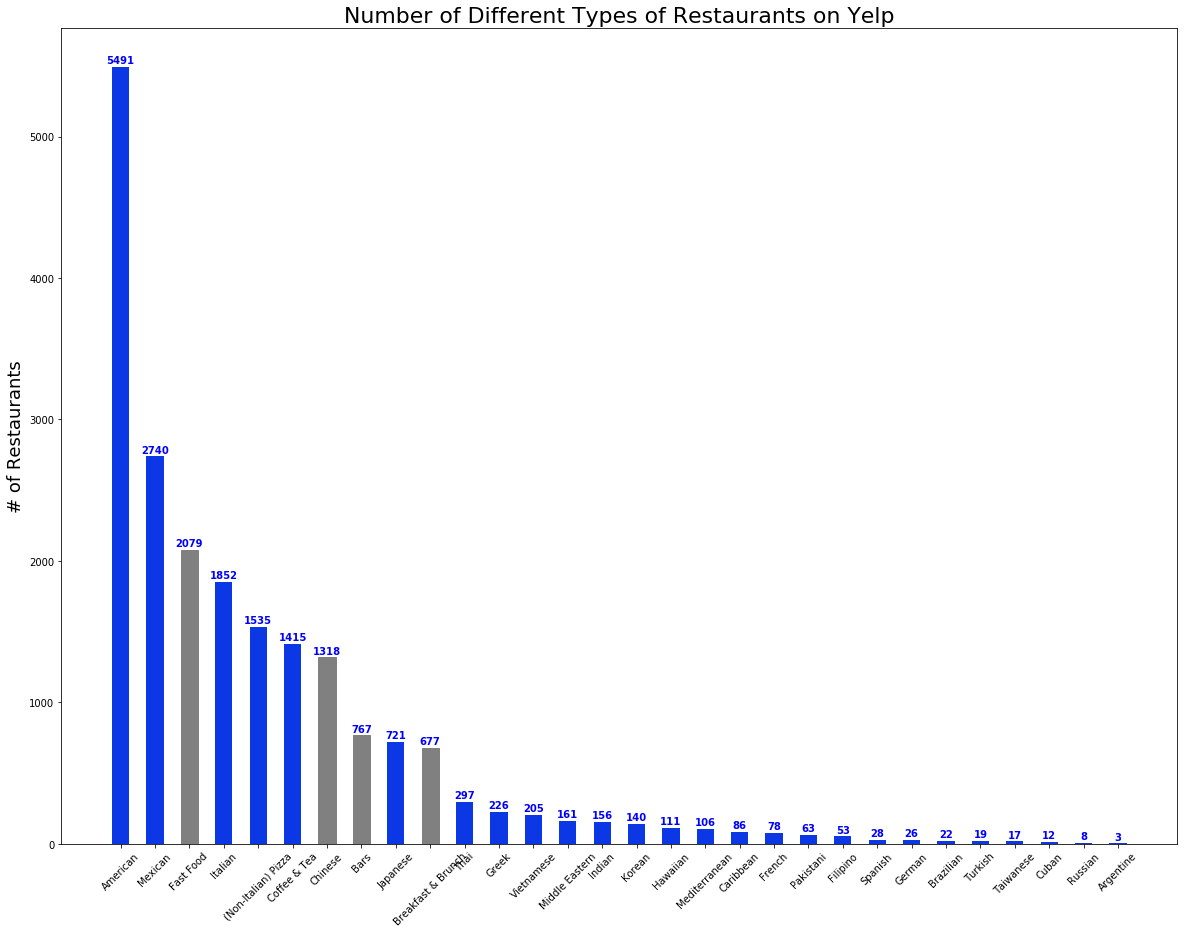

In [188]:
f, ax = plt.subplots(figsize=(20,15))
barlist = plt.bar (countName, height=counts, width=0.5,color='#0b37e5')
for i, v in enumerate(counts):
    ax.text(i, v + 25, str(v), color='blue', fontweight='bold', ha='center')
plt.title('Number of Different Types of Restaurants on Yelp', fontsize=22)
barlist[2].set_color('grey')
barlist[7].set_color('grey')
barlist[6].set_color('grey')
barlist[9].set_color('grey')
plt.xticks(rotation=45)
plt.ylabel('# of Restaurants', fontsize=18)

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


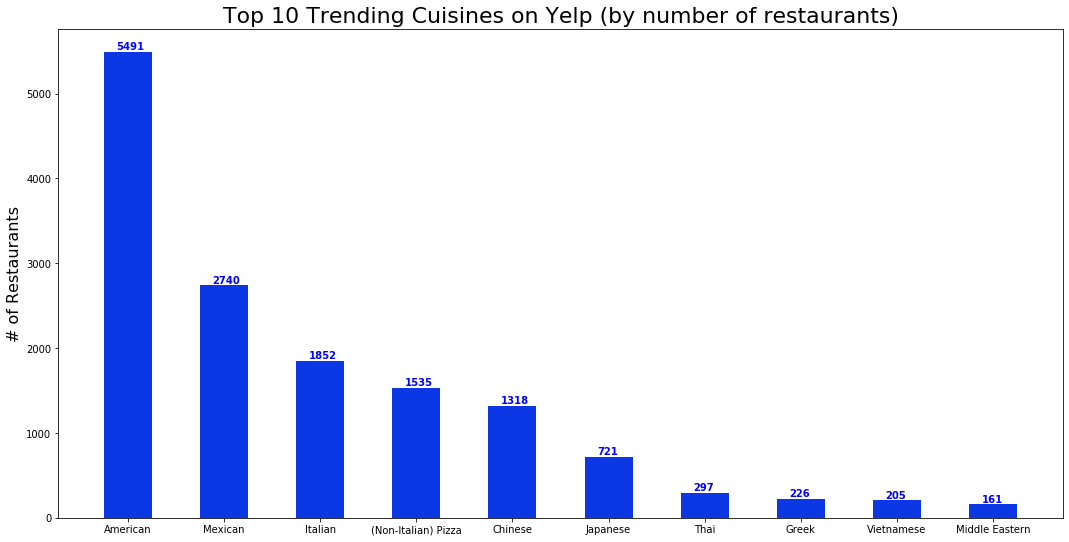

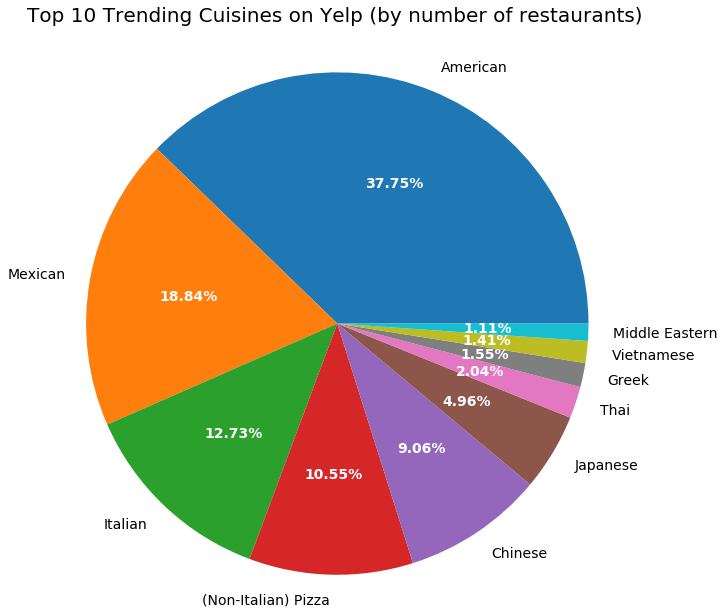

In [189]:
# for c in cuisine:
#     print(c)
#     print(len(cuiDic[c]))
f, ax = plt.subplots(figsize=(18,9))
barlist = plt.bar (countName2[0:10], height=counts2[0:10], width=0.5,color='#0b37e5')
for i, v in enumerate(counts2[0:10]):
    ax.text(i - 0.12, v + 25, str(v), color='blue', fontweight='bold')
plt.title('Top 10 Trending Cuisines on Yelp (by number of restaurants)', fontsize=22)
# barlist[2].set_color('grey')
# barlist[7].set_color('grey')
# barlist[6].set_color('grey')
# barlist[9].set_color('grey')
plt.ylabel('# of Restaurants', fontsize=16)

f2, ax2 = plt.subplots(figsize=(10,10))
patches, texts, autotexts = plt.pie (x=counts2[0:10], labels=countName2[0:10], autopct='%1.2f%%')
ax2.axis('equal')
for t in texts:
    t.set_fontsize(14)
for at in autotexts:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp (by number of restaurants)\n', fontsize=20)
f2.show()

In [190]:
ciCount = dict()
for c in cuisine:
    ciCount[c] = 0

for i in range(len(checkin)):
    row = checkin.iloc[i]
    business = row.business_id
    count = len(row.date.split(', '))
    for c in cuisine:
        if business in cuiDic[c]:
            ciCount[c] = ciCount[c] + count

In [191]:
del (ciCount['Fast Food'])
del (ciCount['Bars'])
del (ciCount['Coffee & Tea'])
del (ciCount['Breakfast & Brunch'])

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


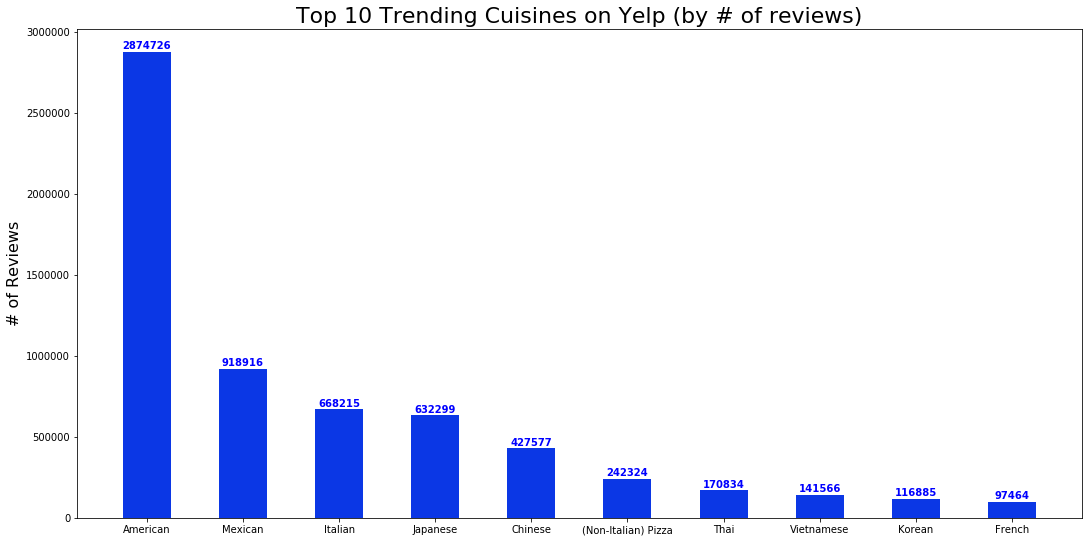

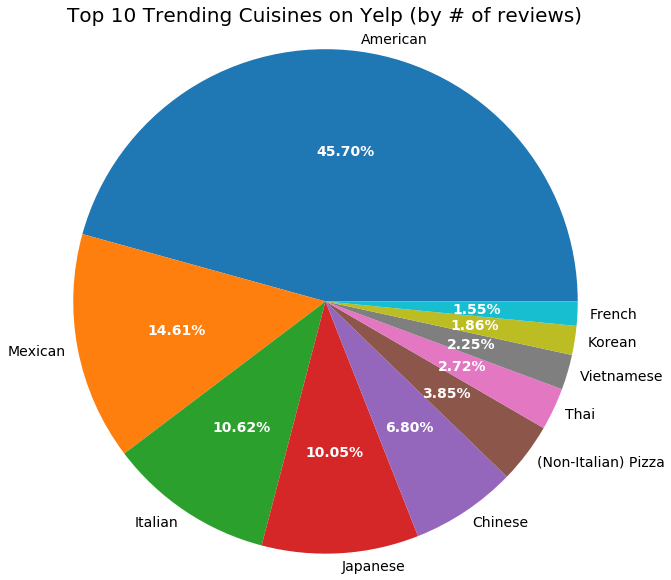

In [192]:
sortciCount = sorted(ciCount.items(), key=lambda x: x[1], reverse=True)
countName3 = list()
counts3 = list()
for i in sortciCount:
    countName3.append(i[0])
    counts3.append(i[1])
    
countName3[5] = '(Non-Italian) Pizza'

f3, ax3 = plt.subplots(figsize=(18,9))
plt.bar (countName3[0:10], height=counts3[0:10], width=0.5,color='#0b37e5')
for i, v in enumerate(counts3[0:10]):
    ax3.text(i, v + 20000, str(v), color='blue', fontweight='bold', ha='center')
plt.title('Top 10 Trending Cuisines on Yelp (by # of reviews)', fontsize=22)
plt.ylabel('# of Reviews', fontsize=16)

f4, ax4 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts3[0:10], labels=countName3[0:10], autopct='%1.2f%%', labeldistance=1.05)
ax4.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp (by # of reviews)', fontsize=20)
f4.show()

In [247]:
# reviewCount = dict()
# for c in cuisine:
#     reviewCount[c] = 0

# for i in range(len(review)):
#     row = review.iloc[i]
#     business = row.business_id
#     for c in cuisine:
#         if business in cuiDic[c]:
#             reviewCount[c] = reviewCount[c] + 1
#     if i % 10000 == 0: print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [251]:
# del (reviewCount['Fast Food'])
# del (reviewCount['Bars'])
# del (reviewCount['Coffee & Tea'])
# del (reviewCount['Breakfast & Brunch'])

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


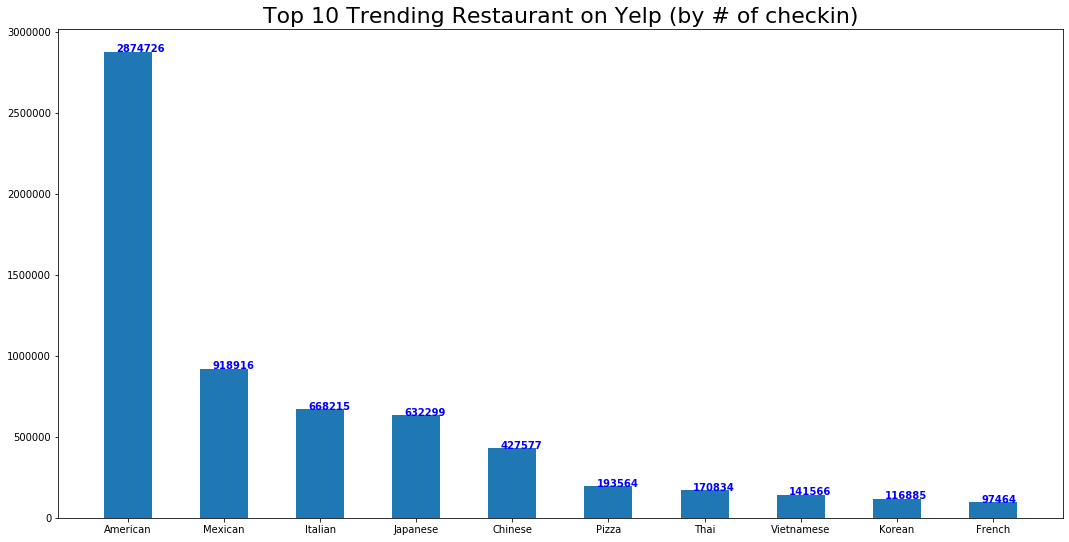

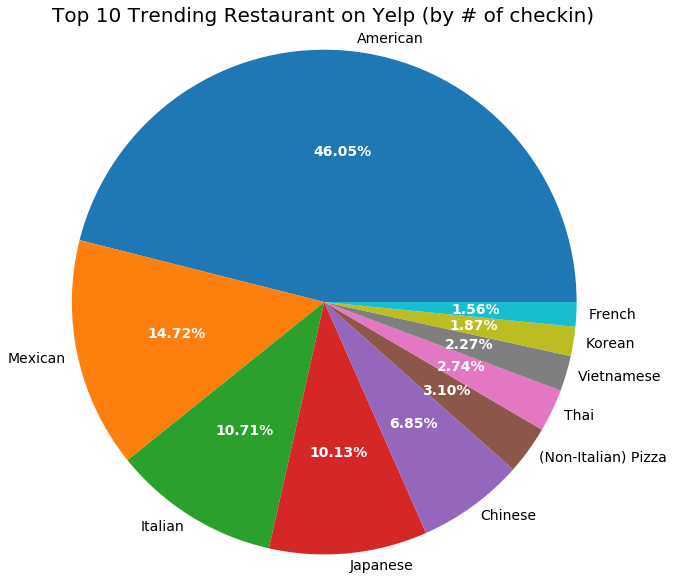

In [266]:
# reviewCount = sorted(ciCount.items(), key=lambda x: x[1], reverse=True)
# countName4 = list()
# counts4 = list()
# for i in sortciCount:
#     countName4.append(i[0])
#     counts4.append(i[1])
    
# #countName3[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5)
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.12, v + 25, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp (by # of checkin)', fontsize=22)

# f6, ax6 = plt.subplots(figsize=(10,10))
# patches2, texts2, autotexts2 = plt.pie (x=counts3[0:10], labels=countName3[0:10], autopct='%1.2f%%', labeldistance=1.05)
# ax6.axis('equal')
# for t in texts2:
#     t.set_fontsize(14)
# for at in autotexts2:
#     at.set_fontsize(14)
#     at.set_color('white')
#     at.set_fontweight('bold')
# plt.title('Top 10 Trending Restaurant on Yelp (by # of checkin)', fontsize=20)
# f4.show()

In [193]:
count2013 = dict()
count2015 = dict()
count2017 = dict()
count2019 = dict()

for c in cuisine:
    count2013[c] = 0
    count2019[c] = 0
    count2017[c] = 0
    count2015[c] = 0

for i in range(len(review)):
    row = review.iloc[i]
    business = row.business_id
    if (row.date.year not in [2013, 2015, 2017, 2019]):
        continue
    year = row.date.year
    for c in cuisine:
        if business in cuiDic[c]:
            if year == 2013:
                count2013[c] = count2013[c] + 1
            elif year == 2015:
                count2015[c] = count2015[c] + 1
            elif year == 2017:
                count2017[c] = count2017[c] + 1
            else:
                count2019[c] = count2019[c] + 1
    if i % 10000 == 0: print(i)

0
20000
50000
90000
110000
120000
240000
250000
260000
270000
280000
290000
340000
350000
360000
380000
400000
410000
460000
470000
480000
490000
510000
520000
540000
550000
560000
570000
580000
590000
600000
610000
630000
640000
660000
680000
700000
720000
730000
770000
780000
790000
800000
830000
870000
890000
910000
920000
940000
950000
1000000
1030000
1050000
1060000
1090000
1100000
1110000
1160000
1180000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1360000
1370000
1380000
1400000
1420000
1440000
1530000
1590000
1600000
1620000
1630000
1640000
1660000
1670000
1680000
1710000
1720000
1740000
1780000
1790000
1830000
1850000
1880000
1910000
1920000
1950000
1960000
1980000
1990000
2000000
2090000
2140000
2150000
2160000
2180000
2190000
2200000
2230000
2270000
2290000
2300000
2310000
2320000
2330000
2340000
2360000
2410000
2440000
2450000
2460000
2500000
2530000
2610000
2620000
2630000
2640000
2650000
2660000
2670000
2680000
2690000
2700000
2710000
2740000
27

In [194]:
del (count2013['Fast Food'])
del (count2013['Bars'])
del (count2013['Coffee & Tea'])
del (count2013['Breakfast & Brunch'])

del (count2015['Fast Food'])
del (count2015['Bars'])
del (count2015['Coffee & Tea'])
del (count2015['Breakfast & Brunch'])

del (count2017['Fast Food'])
del (count2017['Bars'])
del (count2017['Coffee & Tea'])
del (count2017['Breakfast & Brunch'])

del (count2019['Fast Food'])
del (count2019['Bars'])
del (count2019['Coffee & Tea'])
del (count2019['Breakfast & Brunch'])

In [195]:
sorted13 = sorted(count2013.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted13:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5, color='#1b53f3')
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.18, v + 500, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp in 2013 (by # of reviews)', fontsize=22)

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


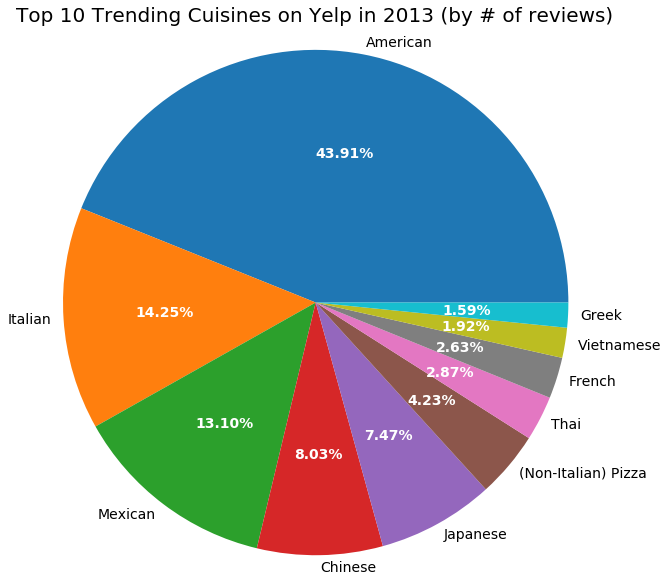

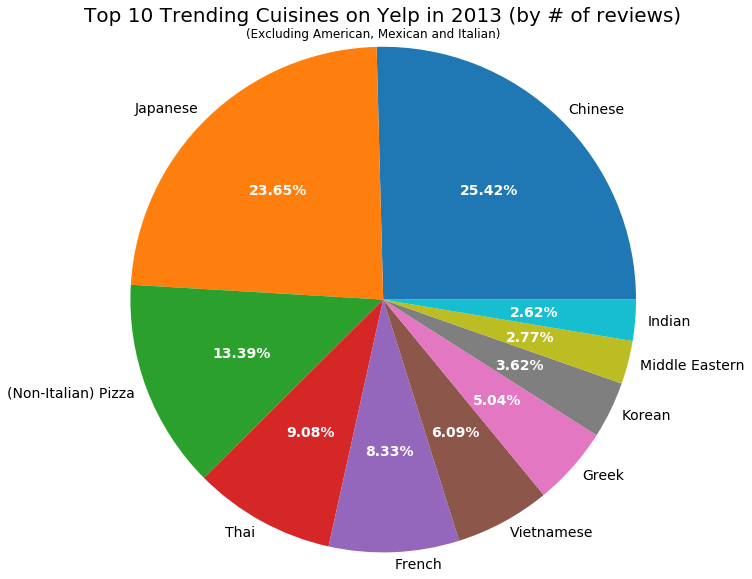

In [196]:
f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[0:10], labels=countName4[0:10], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2013 (by # of reviews)', fontsize=20)
f6.show()

f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2013 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

In [197]:
sorted15 = sorted(count2015.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted15:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5, color='#1b53f3')
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.18, v + 500, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp in 2015 (by # of reviews)', fontsize=22)

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


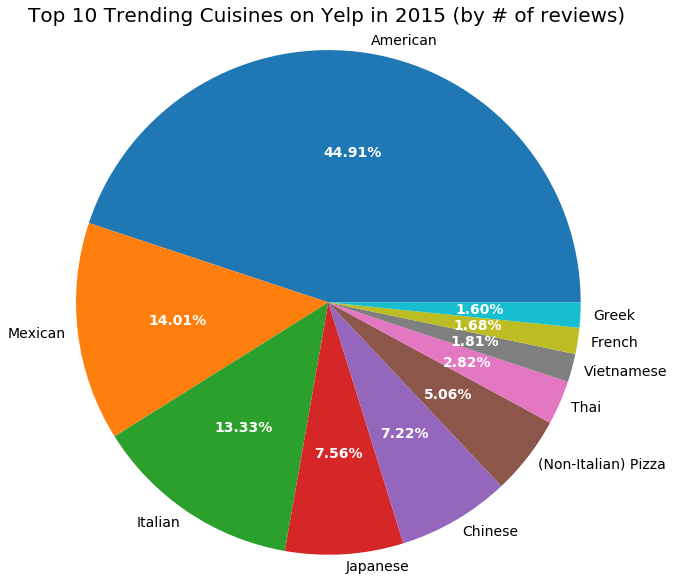

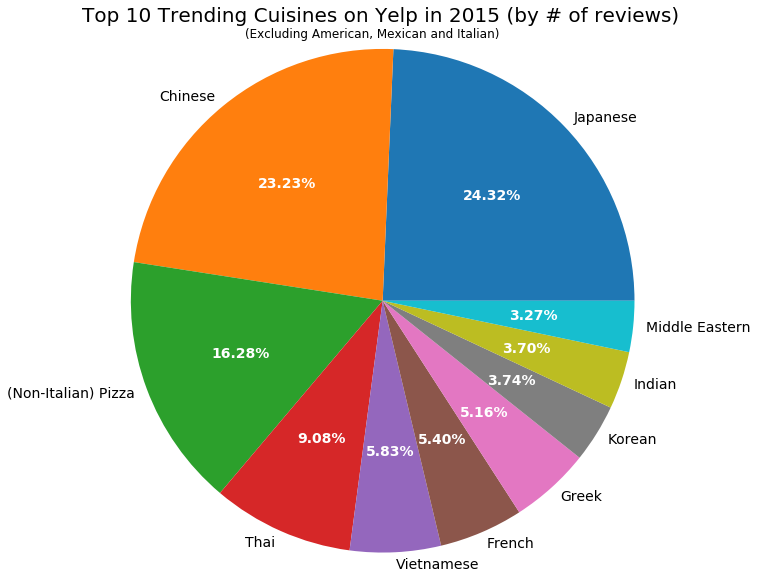

In [198]:
f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[0:10], labels=countName4[0:10], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2015 (by # of reviews)', fontsize=20)
f6.show()

f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2015 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


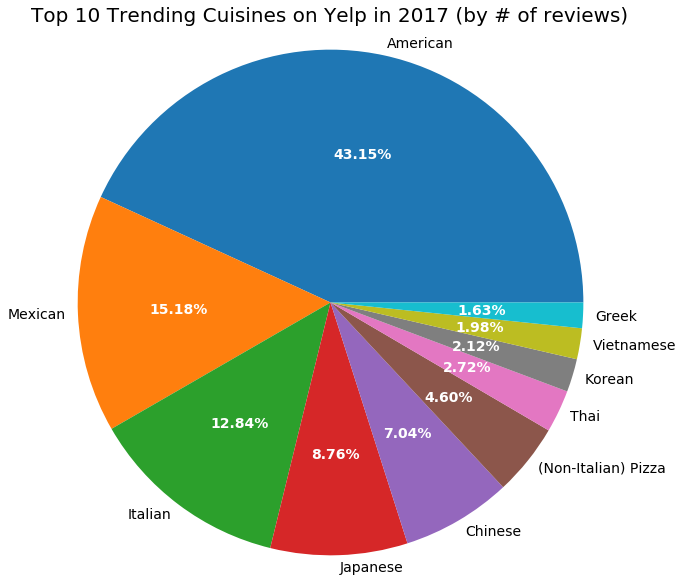

In [200]:
sorted17 = sorted(count2017.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted17:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5, color='#1b53f3')
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.18, v + 500, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp in 2015 (by # of reviews)', fontsize=22)

f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[0:10], labels=countName4[0:10], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2017 (by # of reviews)', fontsize=20)
f6.show()

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


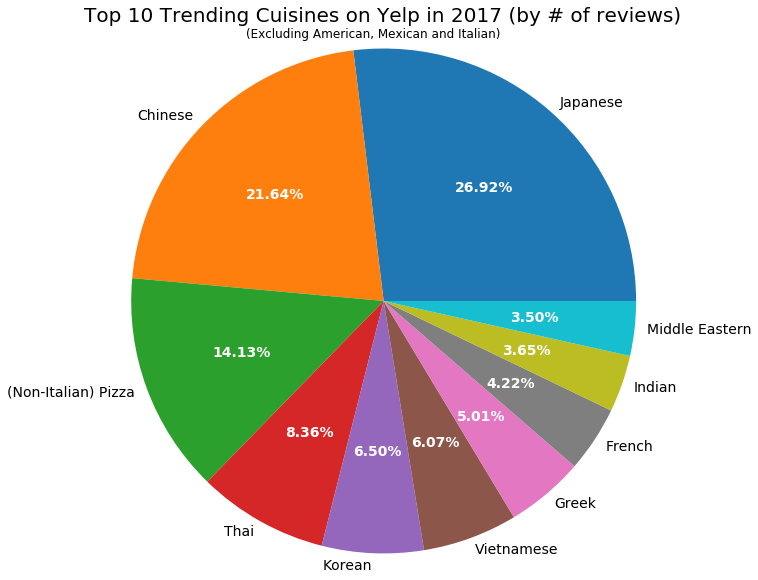

In [201]:
f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2017 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


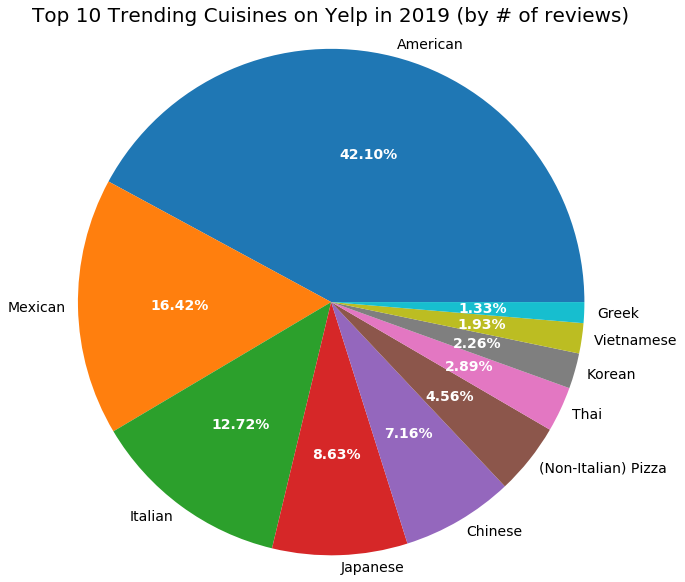

In [202]:
sorted19 = sorted(count2019.items(), key=lambda x: x[1], reverse=True)
countName4 = list()
counts4 = list()
for i in sorted19:
    countName4.append(i[0])
    counts4.append(i[1])
    
countName4[5] = '(Non-Italian) Pizza'

# f5, ax5 = plt.subplots(figsize=(18,9))
# plt.bar (countName4[0:10], height=counts4[0:10], width=0.5, color='#1b53f3')
# for i, v in enumerate(counts4[0:10]):
#     ax5.text(i - 0.18, v + 500, str(v), color='blue', fontweight='bold')
# plt.title('Top 10 Trending Restaurant on Yelp in 2015 (by # of reviews)', fontsize=22)

f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[0:10], labels=countName4[0:10], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2019 (by # of reviews)', fontsize=20)
f6.show()

C:\Users\gzlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


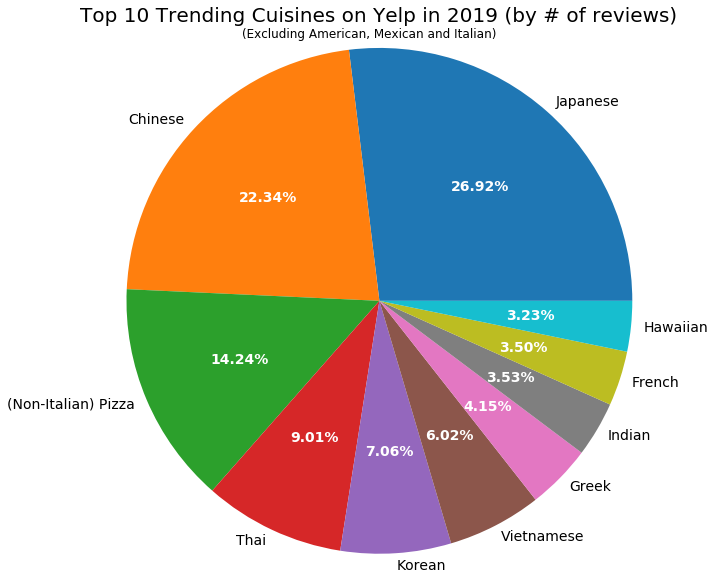

In [203]:
f6, ax6 = plt.subplots(figsize=(10,10))
patches2, texts2, autotexts2 = plt.pie (x=counts4[3:13], labels=countName4[3:13], autopct='%1.2f%%', labeldistance=1.05)
ax6.axis('equal')
for t in texts2:
    t.set_fontsize(14)
for at in autotexts2:
    at.set_fontsize(14)
    at.set_color('white')
    at.set_fontweight('bold')
plt.title('Top 10 Trending Cuisines on Yelp in 2019 (by # of reviews)', fontsize=20)
plt.suptitle('(Excluding American, Mexican and Italian)', x=0.5, y=0.88, fontsize=12)
f6.show()

In [207]:
cuisine2 = ['Chinese', 'Italian', 'Japanese', 'Korean', 'Mexican', 'American', 'Greek', 'French', 'Spanish', 'Turkish', 'Vietnamese',
          'Taiwanese', 'Russian', 'German',  'Argentine', 'Thai', 'Middle Eastern', 'Brazilian', 'Pakistani', 
          'Indian','Filipino', 'Pizza', 'Caribbean', 'Hawaiian', 'Cuban', 'Mediterranean']

countMonth = dict()

for i in range(1, 13):
    countMonth[i] = dict()
    for c in cuisine:
        countMonth[i][c] = 0

for i in range(len(review)):
    row = review.iloc[i]
    business = row.business_id
    if (row.date.year != 2019):
        continue
    month = row.date.month
    for c in cuisine2:
        if business in cuiDic[c]:
            countMonth[month][c] = countMonth[month][c] + 1
    if i % 10000 == 0: print(i)

240000
250000
260000
270000
280000
510000
520000
540000
550000
580000
590000
600000
610000
630000
870000
890000
910000
920000
940000
950000
1250000
1270000
1290000
1300000
1310000
1320000
1330000
1530000
1600000
1620000
1630000
1640000
1670000
1950000
1960000
1990000
2000000
2290000
2310000
2320000
2330000
2620000
2630000
2640000
2650000
2660000
2670000
2680000
2700000
2920000
2950000
2980000
2990000
3000000
3010000
3280000
3300000
3310000
3320000
3350000


In [232]:
countName5

['American',
 'Mexican',
 'Italian',
 'Japanese',
 'Chinese',
 'Pizza',
 'Thai',
 'Korean',
 'Vietnamese',
 'Greek',
 'Indian',
 'French',
 'Hawaiian',
 'Middle Eastern',
 'Mediterranean',
 'Spanish',
 'Pakistani',
 'Caribbean',
 'Brazilian',
 'German',
 'Filipino',
 'Taiwanese',
 'Cuban',
 'Turkish',
 'Russian',
 'Argentine',
 'Coffee & Tea',
 'Breakfast & Brunch',
 'Fast Food',
 'Bars']

Text(0.5, 1.0, 'Top 9th to 13th Trending Cuisines in 2019 (by number of reviews)')

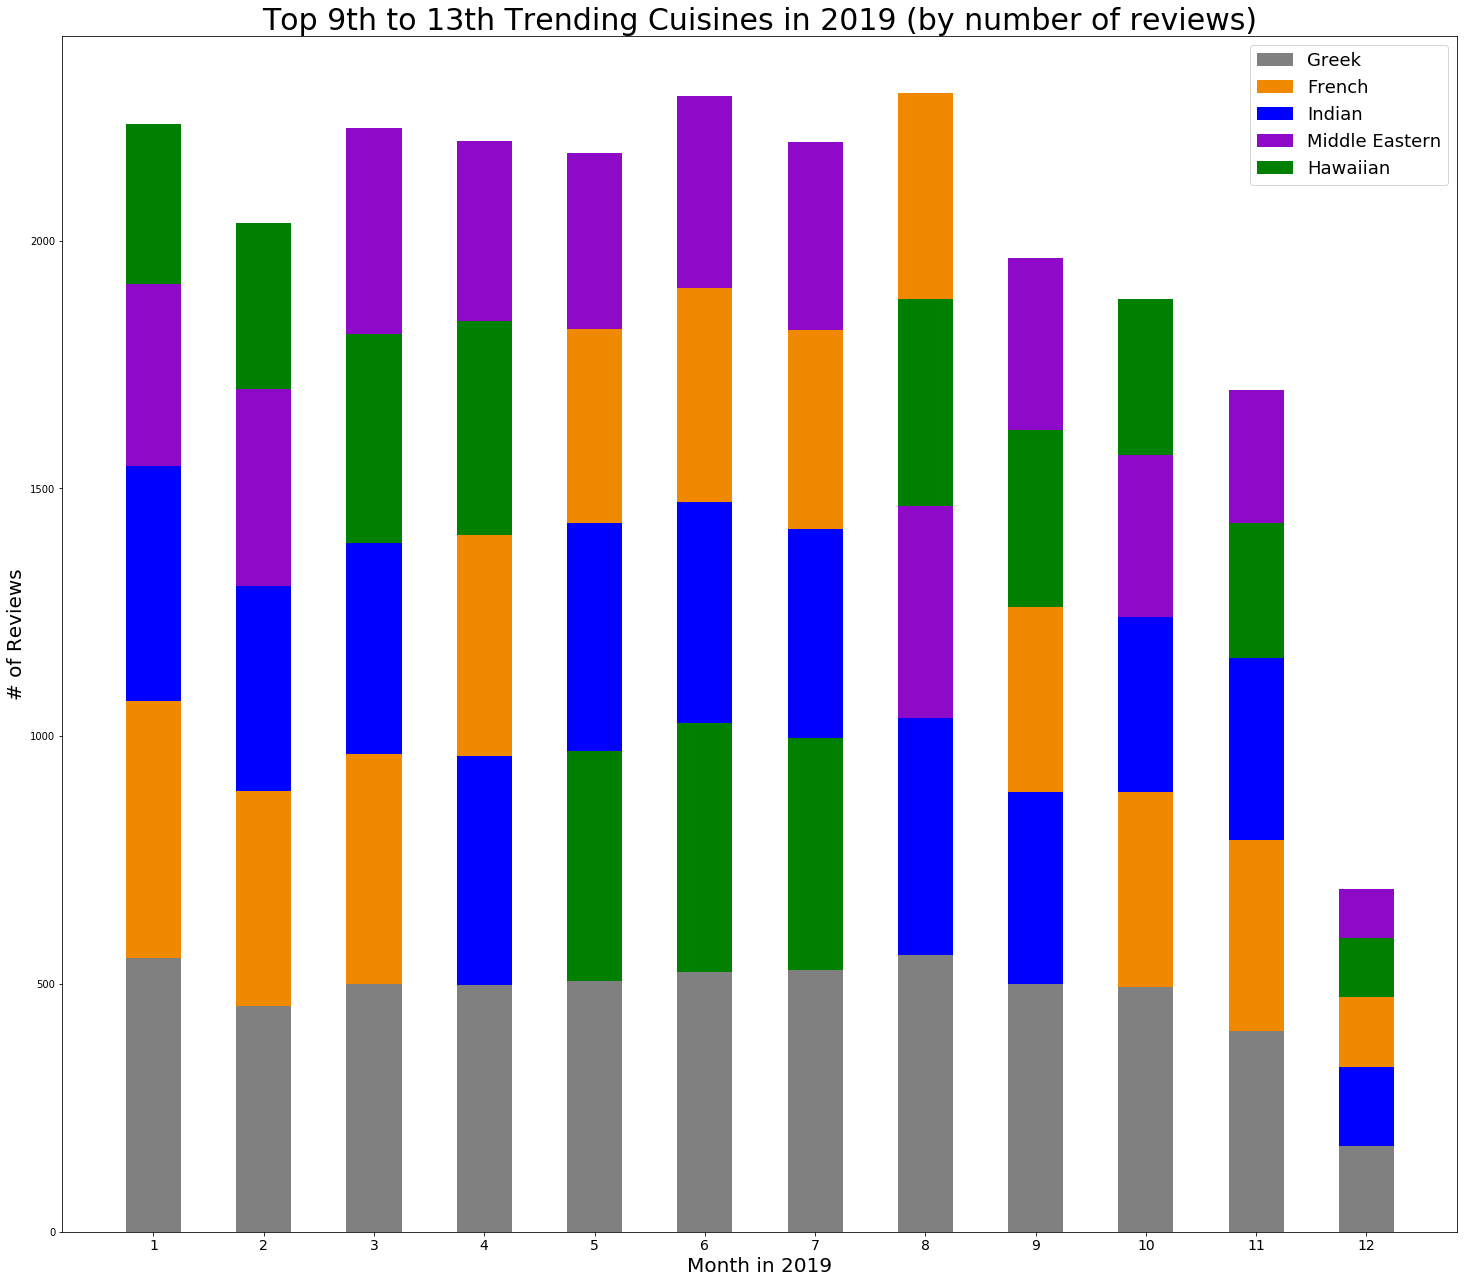

In [325]:
countName5 = list()
counts5 = list()
colorDic = {'Indian': 'blue', 'Korean': 'cyan', 'Vietnamese': 'green', 'Greek':'grey', 'Hawaiian': 'green', 'French': '#f08800', 'Middle Eastern': '#8e09c8'}

f7, ax7 = plt.subplots(figsize=(25,22))
ticks = list()
bars = list()
for i in range(1, 13):
    monCount = countMonth[i]
    sortedMon = sorted(monCount.items(), key=lambda x: x[1], reverse=True)
    countName5 = list()
    counts5 = list()
    for j in sortedMon:
        if (j[0] == 'Pizza'):
            countName5.append('(Non-italian) Pizza')
        else:
            countName5.append(j[0])
        counts5.append(j[1])

    b0 = ax7.bar(i, counts5[9], width = 0.5, color=colorDic[countName5[9]])
    bars.append(b0)
    prevSum = counts5[9]
    for j in range(10, 14):
        b = ax7.bar(i, counts5[j], width = 0.5, bottom = prevSum, color=colorDic[countName5[j]])
        bars.append(b)
        prevSum = prevSum + counts5[j]
plt.xticks(range(1, 13), fontsize=14)
plt.xlabel("Month in 2019", fontsize=20)
plt.ylabel("# of Reviews", fontsize=20)
bars[5] = bars[14]
plt.legend(bars[0:6],['Greek', 'French', 'Indian', 'Middle Eastern', 'Hawaiian'], fontsize = 18)
plt.title('Top 9th to 13th Trending Cuisines in 2019 (by number of reviews)', fontsize=30)